# ECE239AS Project

#### Load the dataset

In [1]:
from useful.utils import *
from useful.CNN_RNN_v1 import *
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)


/Users/shuangyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)


# CNN+ LSTM

In [6]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

criteria = F.cross_entropy

def train(epoch,crop):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data[:,:,:crop]), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=val_loader, mode = 'val',crop=1000):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data[:,:,:crop], volatile=True), Variable(target).long()
        output = model(data)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

def main_train(epoches = 10,crop=1000):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    stats['test']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch,crop)
        stats['train'].append(test(train_loader, mode='train',crop=crop))
        stats['val'].append(test(val_loader, mode='val',crop=crop))       
        stats['test'].append(test(test_loader, mode = 'val',crop=crop))

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])
    stats['test'] = np.array(stats['test'])
    print("Best test acc is :")
    print(np.amax(stats['test'][:,1]))

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

### subject 1

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
-------------------- 100 --------------------
Train Epoch: 0 [0/187 (0%)]	Loss: 1.379863
Train Epoch: 0 [100/187 (50%)]	Loss: 1.401622
train loss: 1.3863, Accuracy: 47/187 (25%)
validation loss: 1.3861, Accuracy: 13/50 (26%)

validation loss: 1.3877, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.393035
Train Epoch: 1 [100/187 (50%)]	Loss: 1.398900
train loss: 1.3794, Accuracy: 47/187 (25%)
validation loss: 1.3830, Accuracy: 13/50 (26%)

validation loss: 1.3821, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.375257
Train Epoch: 2 [100/187 (50%)]	Loss: 1.378116
train loss: 1.3646, Accuracy: 81/187 (43%)
validation loss: 1.3743, Accuracy: 16/50 (32%)

validation loss: 1.3724, Accuracy: 16/50 (32%)


validation loss: 1.1942, Accuracy: 31/50 (62%)

Train Epoch: 4 [0/187 (0%)]	Loss: 0.015189
Train Epoch: 4 [100/187 (50%)]	Loss: 0.017659
train loss: 0.0137, Accuracy: 187/187 (100%)
validation loss: 1.3534, Accuracy: 27/50 (54%)

validation loss: 1.2164, Accuracy: 30/50 (60%)

Train Epoch: 5 [0/187 (0%)]	Loss: 0.013058
Train Epoch: 5 [100/187 (50%)]	Loss: 0.013369
train loss: 0.0127, Accuracy: 187/187 (100%)
validation loss: 1.3760, Accuracy: 27/50 (54%)

validation loss: 1.1841, Accuracy: 30/50 (60%)

Train Epoch: 6 [0/187 (0%)]	Loss: 0.014197
Train Epoch: 6 [100/187 (50%)]	Loss: 0.013248
train loss: 0.0122, Accuracy: 187/187 (100%)
validation loss: 1.3893, Accuracy: 28/50 (56%)

validation loss: 1.1667, Accuracy: 31/50 (62%)

Train Epoch: 7 [0/187 (0%)]	Loss: 0.011985
Train Epoch: 7 [100/187 (50%)]	Loss: 0.013127
train loss: 0.0121, Accuracy: 187/187 (100%)
validation loss: 1.3939, Accuracy: 27/50 (54%)

validation loss: 1.1524, Accuracy: 32/50 (64%)

Train Epoch: 8 [0/187 (0%)]	Loss

validation loss: 1.1266, Accuracy: 28/50 (56%)

Train Epoch: 9 [0/187 (0%)]	Loss: 0.008727
Train Epoch: 9 [100/187 (50%)]	Loss: 0.010942
train loss: 0.0094, Accuracy: 187/187 (100%)
validation loss: 1.4661, Accuracy: 25/50 (50%)

validation loss: 1.1209, Accuracy: 29/50 (58%)

Train Epoch: 10 [0/187 (0%)]	Loss: 0.011614
Train Epoch: 10 [100/187 (50%)]	Loss: 0.009395
train loss: 0.0088, Accuracy: 187/187 (100%)
validation loss: 1.4030, Accuracy: 27/50 (54%)

validation loss: 1.1138, Accuracy: 29/50 (58%)

Train Epoch: 11 [0/187 (0%)]	Loss: 0.010100
Train Epoch: 11 [100/187 (50%)]	Loss: 0.008811
train loss: 0.0090, Accuracy: 187/187 (100%)
validation loss: 1.4142, Accuracy: 26/50 (52%)

validation loss: 1.1078, Accuracy: 29/50 (58%)

Train Epoch: 12 [0/187 (0%)]	Loss: 0.012818
Train Epoch: 12 [100/187 (50%)]	Loss: 0.009090
train loss: 0.0086, Accuracy: 187/187 (100%)
validation loss: 1.4449, Accuracy: 25/50 (50%)

validation loss: 1.1147, Accuracy: 30/50 (60%)

Train Epoch: 13 [0/187 (0%

validation loss: 1.3438, Accuracy: 25/50 (50%)

Train Epoch: 14 [0/187 (0%)]	Loss: 0.007356
Train Epoch: 14 [100/187 (50%)]	Loss: 0.007328
train loss: 0.0080, Accuracy: 187/187 (100%)
validation loss: 1.4448, Accuracy: 23/50 (46%)

validation loss: 1.2970, Accuracy: 27/50 (54%)

Best test acc is :
0.6
-------------------- 800 --------------------
Train Epoch: 0 [0/187 (0%)]	Loss: 0.008641
Train Epoch: 0 [100/187 (50%)]	Loss: 0.007656
train loss: 0.0074, Accuracy: 187/187 (100%)
validation loss: 1.4232, Accuracy: 23/50 (46%)

validation loss: 1.2502, Accuracy: 27/50 (54%)

Train Epoch: 1 [0/187 (0%)]	Loss: 0.008084
Train Epoch: 1 [100/187 (50%)]	Loss: 0.006751
train loss: 0.0070, Accuracy: 187/187 (100%)
validation loss: 1.4055, Accuracy: 24/50 (48%)

validation loss: 1.2300, Accuracy: 27/50 (54%)

Train Epoch: 2 [0/187 (0%)]	Loss: 0.007053
Train Epoch: 2 [100/187 (50%)]	Loss: 0.008770
train loss: 0.0072, Accuracy: 187/187 (100%)
validation loss: 1.3967, Accuracy: 24/50 (48%)

validatio

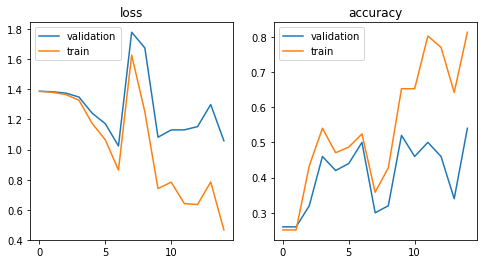

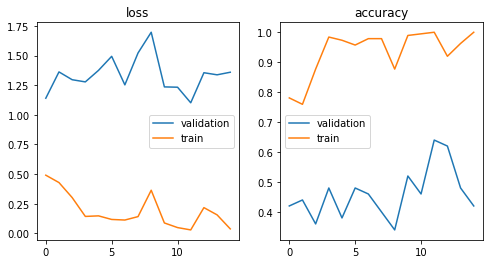

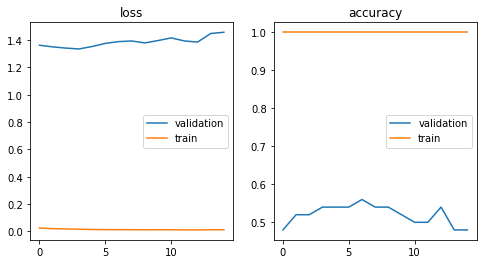

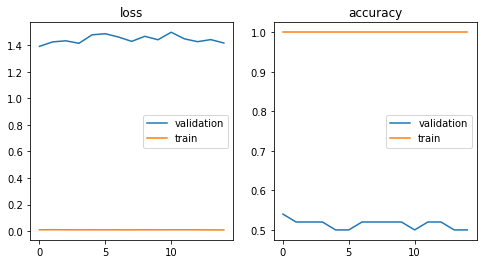

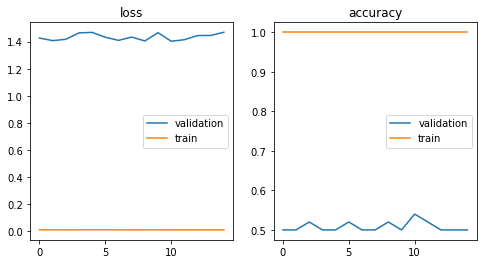

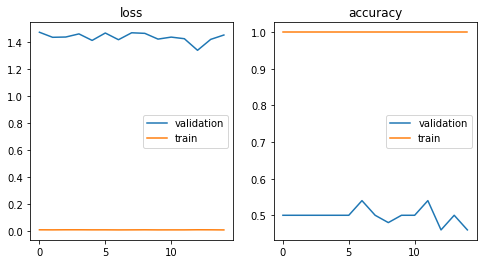

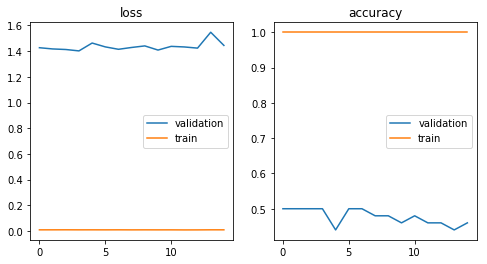

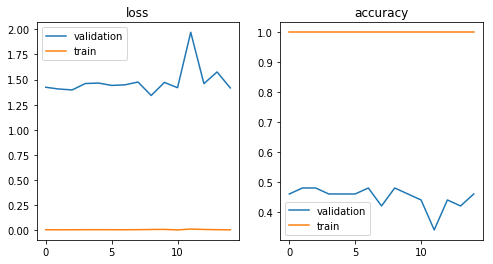

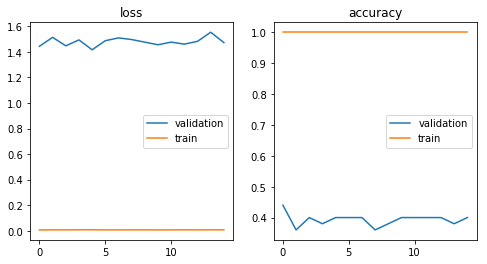

In [7]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
cropes = range(100,1000,100)
for crop in cropes:
    print('-'*20,crop,'-'*20)
    main_train(epoches = 15,crop = crop)

### Train on wholeset

In [ ]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
cropes = range(100,1000,100)
for crop in cropes:
    print('-'*20,crop,'-'*20)
    main_train(epoches = 15,crop = crop)

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 8 [1350/1838 (73%)]	Loss: 1.186789
Train Epoch: 8 [1500/1838 (81%)]	Loss: 1.036345
Train Epoch: 8 [1650/1838 (89%)]	Loss: 1.076227
Train Epoch: 8 [1800/1838 (97%)]	Loss: 0.982487
train loss: 1.0083, Accuracy: 1026/1838 (56%)
validation loss: 1.1582, Accuracy: 127/270 (47%)

validation loss: 1.1538, Accuracy: 211/450 (47%)

Train Epoch: 9 [0/1838 (0%)]	Loss: 1.017051
Train Epoch: 9 [150/1838 (8%)]	Loss: 0.939106
Train Epoch: 9 [300/1838 (16%)]	Loss: 1.091727
Train Epoch: 9 [450/1838 (24%)]	Loss: 1.157641
Train Epoch: 9 [600/1838 (32%)]	Loss: 0.927629
Train Epoch: 9 [750/1838 (40%)]	Loss: 0.926372
Train Epoch: 9 [900/1838 (48%)]	Loss: 1.215357
Train Epoch: 9 [1050/1838 (56%)]	Loss: 1.120076
Train Epoch: 9 [1200/1838 (65%)]	Loss: 1.195527
Train Epoch: 9 [1350/1838 (73%)]	Loss: 1.092410
Train Epoch: 9 [1500/1838 (81%)]	Loss: 1.061998
Train Epoch: 9 [1650/1838 (89%)]	Loss: 1.115433
Train Epoch: 9 [1800/1838 (97%)]	Loss: 1.005287
train loss: 0.9914, Accuracy: 1055/1838 (57%)
val

Train Epoch: 4 [450/1838 (24%)]	Loss: 0.495944
Train Epoch: 4 [600/1838 (32%)]	Loss: 0.382659
Train Epoch: 4 [750/1838 (40%)]	Loss: 0.504379
Train Epoch: 4 [900/1838 (48%)]	Loss: 0.420424
Train Epoch: 4 [1050/1838 (56%)]	Loss: 0.576436
Train Epoch: 4 [1200/1838 (65%)]	Loss: 0.650899
Train Epoch: 4 [1350/1838 (73%)]	Loss: 0.445889
Train Epoch: 4 [1500/1838 (81%)]	Loss: 0.586289
Train Epoch: 4 [1650/1838 (89%)]	Loss: 0.451602
Train Epoch: 4 [1800/1838 (97%)]	Loss: 0.470851
train loss: 0.5847, Accuracy: 1347/1838 (73%)
validation loss: 1.4463, Accuracy: 118/270 (44%)

validation loss: 1.6158, Accuracy: 188/450 (42%)

Train Epoch: 5 [0/1838 (0%)]	Loss: 0.436246
Train Epoch: 5 [150/1838 (8%)]	Loss: 0.598383
Train Epoch: 5 [300/1838 (16%)]	Loss: 0.688093
Train Epoch: 5 [450/1838 (24%)]	Loss: 0.519027
Train Epoch: 5 [600/1838 (32%)]	Loss: 0.571710
Train Epoch: 5 [750/1838 (40%)]	Loss: 0.502305
Train Epoch: 5 [900/1838 (48%)]	Loss: 0.523252
Train Epoch: 5 [1050/1838 (56%)]	Loss: 0.515074
Train

validation loss: 2.1220, Accuracy: 214/450 (48%)

Best test acc is :
0.47555555555555556
-------------------- 300 --------------------
Train Epoch: 0 [0/1838 (0%)]	Loss: 0.068478
Train Epoch: 0 [150/1838 (8%)]	Loss: 0.234333
Train Epoch: 0 [300/1838 (16%)]	Loss: 0.142068
Train Epoch: 0 [450/1838 (24%)]	Loss: 0.066188
Train Epoch: 0 [600/1838 (32%)]	Loss: 0.131032
Train Epoch: 0 [750/1838 (40%)]	Loss: 0.086771
Train Epoch: 0 [900/1838 (48%)]	Loss: 0.094960
Train Epoch: 0 [1050/1838 (56%)]	Loss: 0.116359
Train Epoch: 0 [1200/1838 (65%)]	Loss: 0.118843
Train Epoch: 0 [1350/1838 (73%)]	Loss: 0.092938
Train Epoch: 0 [1500/1838 (81%)]	Loss: 0.264155
Train Epoch: 0 [1650/1838 (89%)]	Loss: 0.086933
Train Epoch: 0 [1800/1838 (97%)]	Loss: 0.082653
train loss: 0.1247, Accuracy: 1779/1838 (97%)
validation loss: 2.0265, Accuracy: 120/270 (44%)

validation loss: 2.1272, Accuracy: 204/450 (45%)

Train Epoch: 1 [0/1838 (0%)]	Loss: 0.147480
Train Epoch: 1 [150/1838 (8%)]	Loss: 0.121990
Train Epoch: 1 [

Train Epoch: 10 [1500/1838 (81%)]	Loss: 0.055409
Train Epoch: 10 [1650/1838 (89%)]	Loss: 0.119909
Train Epoch: 10 [1800/1838 (97%)]	Loss: 0.026954
train loss: 0.0422, Accuracy: 1826/1838 (99%)
validation loss: 2.0587, Accuracy: 132/270 (49%)

validation loss: 2.3603, Accuracy: 207/450 (46%)

Train Epoch: 11 [0/1838 (0%)]	Loss: 0.018476
Train Epoch: 11 [150/1838 (8%)]	Loss: 0.112807
Train Epoch: 11 [300/1838 (16%)]	Loss: 0.022307
Train Epoch: 11 [450/1838 (24%)]	Loss: 0.025163
Train Epoch: 11 [600/1838 (32%)]	Loss: 0.027279
Train Epoch: 11 [750/1838 (40%)]	Loss: 0.017125
Train Epoch: 11 [900/1838 (48%)]	Loss: 0.036013
Train Epoch: 11 [1050/1838 (56%)]	Loss: 0.027375
Train Epoch: 11 [1200/1838 (65%)]	Loss: 0.010746
Train Epoch: 11 [1350/1838 (73%)]	Loss: 0.021660
Train Epoch: 11 [1500/1838 (81%)]	Loss: 0.011106
Train Epoch: 11 [1650/1838 (89%)]	Loss: 0.009569
Train Epoch: 11 [1800/1838 (97%)]	Loss: 0.028374
train loss: 0.0132, Accuracy: 1837/1838 (100%)
validation loss: 2.3997, Accuracy:

Train Epoch: 6 [600/1838 (32%)]	Loss: 0.009274
Train Epoch: 6 [750/1838 (40%)]	Loss: 0.007645
Train Epoch: 6 [900/1838 (48%)]	Loss: 0.007904
Train Epoch: 6 [1050/1838 (56%)]	Loss: 0.006077
Train Epoch: 6 [1200/1838 (65%)]	Loss: 0.009921
Train Epoch: 6 [1350/1838 (73%)]	Loss: 0.011470
Train Epoch: 6 [1500/1838 (81%)]	Loss: 0.007836
Train Epoch: 6 [1650/1838 (89%)]	Loss: 0.008649
Train Epoch: 6 [1800/1838 (97%)]	Loss: 0.010623
train loss: 0.0103, Accuracy: 1838/1838 (100%)
validation loss: 2.1599, Accuracy: 128/270 (47%)

validation loss: 2.3570, Accuracy: 201/450 (45%)

Train Epoch: 7 [0/1838 (0%)]	Loss: 0.010233
Train Epoch: 7 [150/1838 (8%)]	Loss: 0.008560
Train Epoch: 7 [300/1838 (16%)]	Loss: 0.012550
Train Epoch: 7 [450/1838 (24%)]	Loss: 0.010562
Train Epoch: 7 [600/1838 (32%)]	Loss: 0.008168
Train Epoch: 7 [750/1838 (40%)]	Loss: 0.008809
Train Epoch: 7 [900/1838 (48%)]	Loss: 0.007978
Train Epoch: 7 [1050/1838 (56%)]	Loss: 0.009801
Train Epoch: 7 [1200/1838 (65%)]	Loss: 0.009397
Tra